# Importe

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import statsmodels.api as sm
from uncertainties import ufloat, unumpy as unp
# import uncertainties
from uncertainties.unumpy import (nominal_values as n, std_devs as s)


plt.style.use('classic')
plt.rc('text', usetex=True)
plt.rc('axes', labelsize=15)# Schriftgröße der x- und y-Beschriftungen

# Daten laden

In [4]:
A1_df = pd.read_csv('A1.txt', sep='\t')     # Kleinbuchstabe: [cm], Großbuchstabe: [Ohm]
A1_df

,R1,r1,R2,r2,R3,r3,R,r,P,p,P1,p1,P2,p2,P3,p3
0,112,49.85,76,45.75,586,1.90,149,57.4,122,7.3,127,50.30,15,71.00,128,9.20
1,212,35.00,167,28.25,467,2.40,49,80.3,222,4.0,34,76.90,124,27.10,158,7.20
2,312,27.00,267,19.70,376,3.30,258,43.7,262,3.3,254,33.50,144,24.35,58,18.45
3,342,25.20,245,21.00,349,3.55,348,36.5,275,3.2,337,27.75,44,49.40,78,14.50
4,44,70.60,363,15.05,249,5.20,444,30.8,375,2.1,423,23.20,344,11.85,178,6.70
5,76,59.90,586,9.85,149,8.65,527,27.4,345,2.4,489,20.90,364,11.25,278,4.20


In [5]:
A1_arr = np.array(A1_df)

# Fehlerrechnung

Ablesefehler: 0.05cm  
Dekadenmesswiderstand:  
1-10 Ohm: R_err= 0.02 +- 0.001 R  
10-1000 Ohm: 0.02 +- 0.0003 R 


## Längenmessung

In [6]:
L_A1_arr = A1_arr[:, 1::2].T / 100
L_A1_arr

array([[0.4985, 0.35  , 0.27  , 0.252 , 0.706 , 0.599 ],
       [0.4575, 0.2825, 0.197 , 0.21  , 0.1505, 0.0985],
       [0.019 , 0.024 , 0.033 , 0.0355, 0.052 , 0.0865],
       [0.574 , 0.803 , 0.437 , 0.365 , 0.308 , 0.274 ],
       [0.073 , 0.04  , 0.033 , 0.032 , 0.021 , 0.024 ],
       [0.503 , 0.769 , 0.335 , 0.2775, 0.232 , 0.209 ],
       [0.71  , 0.271 , 0.2435, 0.494 , 0.1185, 0.1125],
       [0.092 , 0.072 , 0.1845, 0.145 , 0.067 , 0.042 ]])

In [7]:
for i in range(8):
    print(L_A1_arr[i].mean())

0.44591666666666674
0.2326666666666667
0.041666666666666664
0.4601666666666666
0.03716666666666666
0.3875833333333334
0.3249166666666667
0.10041666666666667


In [8]:
lerr = np.ones((8, 6)) * 0.05 / 100

In [9]:
L_err = unp.uarray(L_A1_arr, lerr)
L_err

array([[0.4985+/-0.0005, 0.35+/-0.0005, 0.27+/-0.0005, 0.252+/-0.0005,
        0.706+/-0.0005, 0.599+/-0.0005],
       [0.4575+/-0.0005, 0.2825+/-0.0005, 0.19699999999999998+/-0.0005,
        0.21+/-0.0005, 0.1505+/-0.0005, 0.09849999999999999+/-0.0005],
       [0.019+/-0.0005, 0.024+/-0.0005, 0.033+/-0.0005, 0.0355+/-0.0005,
        0.052000000000000005+/-0.0005, 0.08650000000000001+/-0.0005],
       [0.574+/-0.0005, 0.8029999999999999+/-0.0005,
        0.43700000000000006+/-0.0005, 0.365+/-0.0005, 0.308+/-0.0005,
        0.27399999999999997+/-0.0005],
       [0.073+/-0.0005, 0.04+/-0.0005, 0.033+/-0.0005, 0.032+/-0.0005,
        0.021+/-0.0005, 0.024+/-0.0005],
       [0.503+/-0.0005, 0.769+/-0.0005, 0.335+/-0.0005, 0.2775+/-0.0005,
        0.23199999999999998+/-0.0005, 0.209+/-0.0005],
       [0.71+/-0.0005, 0.271+/-0.0005, 0.24350000000000002+/-0.0005,
        0.494+/-0.0005, 0.1185+/-0.0005, 0.1125+/-0.0005],
       [0.092+/-0.0005, 0.07200000000000001+/-0.0005, 0.1845+/-0.0005,
 

## Widerstandsmessung

In [10]:
R_A1_arr = A1_arr[:, ::2].T
# R_A1_arr

In [11]:
len(str(int(R_A1_arr[7][2])))

2

In [12]:
Fehler_R = np.ones((8,6))
for i in range(8):
    for j in range(6):
        b = int(R_A1_arr[i][j])
        b_str = str(b)
        if len(b_str) ==2:
            eins, zwei, drei = 0,int(b_str[0]),int(b_str[1])
            Fehler_R[i][j] = round(np.sqrt((0.02+0.0003*eins*100)**2+ (0.02+ 0.0003* 10* zwei)**2 + (0.02+ 0.001*drei)**2),2)
        else:
            eins, zwei, drei = int(b_str[0]),int(b_str[1]),int(b_str[2])
            Fehler_R[i][j] = round(np.sqrt((0.02+0.0003*eins*100)**2+ (0.02+ 0.0003* 10* zwei)**2 + (0.02+ 0.001*drei)**2),2)

In [13]:
# Fehler_R

In [14]:
R_err = unp.uarray(R_A1_arr,Fehler_R)
# R_err

# Aufgabe 1

In [15]:
MLerr = unp.uarray(np.ones(8), np.ones(8))
MRerr = unp.uarray(np.ones(8), np.ones(8))
for i in range(8):
    MLerr[i] = L_err[i].mean()
    MRerr[i] = R_err[i].mean()
print(MLerr)
print(MRerr)

[0.44591666666666674+/-0.00020412414523193151
 0.2326666666666667+/-0.00020412414523193151
 0.041666666666666664+/-0.00020412414523193151
 0.4601666666666666+/-0.00020412414523193151
 0.03716666666666666+/-0.00020412414523193151
 0.3875833333333334+/-0.00020412414523193151
 0.3249166666666667+/-0.00020412414523193151
 0.10041666666666667+/-0.00020412414523193151]
[183.0+/-0.03427827300200522 284.0+/-0.04422166387140533
 362.6666666666667+/-0.051827706018220704
 295.8333333333333+/-0.04752192476461084
 266.8333333333333+/-0.03968626966596885
 277.3333333333333+/-0.044032816045409685 172.5+/-0.03299831645537221
 146.33333333333334+/-0.02713136766016618]


## Berechnung von Rx1, Rx2, Rx3

In [16]:
ll = unp.uarray(1, 0)

In [17]:
u_r = np.ones((3, 6))
R_x123 = np.ones((3, 6))
R_123_err = unp.uarray(R_x123, u_r)


In [18]:
R_123_err = R_err * L_err / (ll-L_err)

In [19]:
# R_123_err

In [20]:
# help(plt.errorbar)

In [21]:
R_err

array([[112.0+/-0.06, 212.0+/-0.09, 312.0+/-0.11, 342.0+/-0.12,
        44.0+/-0.04, 76.0+/-0.05],
       [76.0+/-0.05, 167.0+/-0.07, 267.0+/-0.09, 245.0+/-0.09,
        363.0+/-0.12, 586.0+/-0.18],
       [586.0+/-0.18, 467.0+/-0.15, 376.0+/-0.12, 349.0+/-0.12,
        249.0+/-0.09, 149.0+/-0.07],
       [149.0+/-0.07, 49.0+/-0.05, 258.0+/-0.09, 348.0+/-0.12,
        444.0+/-0.15, 527.0+/-0.17],
       [122.0+/-0.06, 222.0+/-0.09, 262.0+/-0.09, 275.0+/-0.09,
        375.0+/-0.12, 345.0+/-0.12],
       [127.0+/-0.06, 34.0+/-0.04, 254.0+/-0.09, 337.0+/-0.12,
        423.0+/-0.14, 489.0+/-0.15],
       [15.0+/-0.04, 124.0+/-0.06, 144.0+/-0.06, 44.0+/-0.04,
        344.0+/-0.12, 364.0+/-0.12],
       [128.0+/-0.06, 158.0+/-0.07, 58.0+/-0.05, 78.0+/-0.05,
        178.0+/-0.07, 278.0+/-0.09]], dtype=object)

In [22]:
s(R_123_err[0])
# R_123_err

array([0.23051125, 0.25552514, 0.29555154, 0.3082901 , 0.27204541,
       0.24783873])

In [23]:
x1 = n(R_err[0])
y1 = n(R_123_err[0])
yerr1 = s(R_123_err[0])

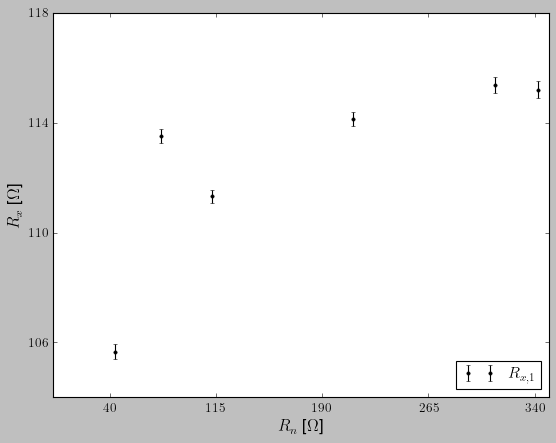

In [24]:
plt.errorbar(x1, y1,
        yerr=yerr1,
        fmt='.',
        color='k',
        capsize=2,
        label=r'$R_{x,1}$')
plt.xticks(np.arange(40, 350, 75))
plt.yticks(np.arange(106, 119, 4))
plt.xlabel(r'$R_{n}$ [$\Omega$]')
plt.ylabel(r'$R_{x}$ [$\Omega$]')
plt.legend(loc=4)
# plt.savefig('R_x1.pdf',dpi=600)
plt.show()

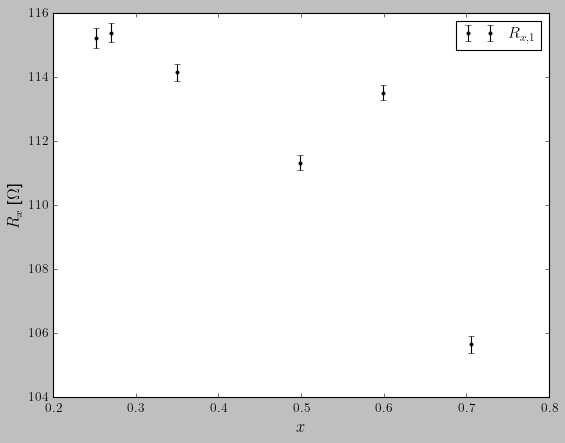

In [25]:
plt.errorbar(n(L_err[0]),
        n(R_123_err[0]),
        yerr=s(R_123_err[0]),
        fmt='.',
        color='k',
        label=r'$R_{x,1}$')
# plt.errorbar(n(L_err[1]),n(R_123_err[1]),yerr=s(R_123_err[1]),fmt='.',color='r', label=r'$R_{x,2}$')
# plt.errorbar(n(L_err[2] ),n(R_123_err[2]),yerr=s(R_123_err[2]),fmt='.',color='b', label=r'$R_{x,3}$')
# plt.errorbar(n(L_err[3]),n(R_123_err[3]),yerr=s(R_123_err[3]),fmt='.',color='y', label=r'$R_{x,1}$')
# plt.errorbar(n(L_err[4]),n(R_123_err[4]),yerr=s(R_123_err[4]),fmt='.',color='g', label=r'$R_{x,2}$')
# plt.errorbar(n(L_err[5] ),n(R_123_err[5]),yerr=s(R_123_err[5]),fmt='.',color='brown', label=r'$R_{x,3}$')
# plt.errorbar(n(L_err[6]),n(R_123_err[6]),yerr=s(R_123_err[6]),fmt='.',color='k', label=r'$R_{x,1}$')
# plt.errorbar(n(L_err[7]),n(R_123_err[7]),yerr=s(R_123_err[7]),fmt='.',color='r', label=r'$R_{x,2}$')
plt.xlabel(r'$x$')
plt.legend()
plt.ylabel(r'$R_{x}$ [$\Omega$]')
plt.show()

## Gewichtes Mittel der einzelnwiderstände
$$ \frac{\sum \frac{x_i}{u_i^2}}{\sum\frac{1}{u_i^2}}$$

In [26]:
# print(R_123_err)

In [27]:
R_err = np.ones(3)
for i in range(3):
    R_err[i] = np.sum(n(R_123_err[i]) / s(R_123_err[i])**2) / np.sum(1 / s(R_123_err[i])**2)
    print(R_err[i])
    print(1 / np.sqrt(np.sum(s(R_123_err[i])**2)))
    print()


112.37627856298418
1.5140140578687253

64.84772245065903
1.7621551838509124

13.470257613611471
1.9776519539942115

